In [46]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
data = pd.read_csv("Käsekammer.csv")

,time,time_iso,orig_value,value,name,variable
0,1702217297000000000,2023-12-10T14:08:17.000Z,71.0,71.0,%H,Humditiy
1,1702217585000000000,2023-12-10T14:13:05.000Z,77.0,77.0,%H,Humditiy
2,1702218185000000000,2023-12-10T14:23:05.000Z,81.0,81.0,%H,Humditiy
3,1702218785000000000,2023-12-10T14:33:05.000Z,84.0,84.0,%H,Humditiy
4,1702219385000000000,2023-12-10T14:43:05.000Z,86.0,86.0,%H,Humditiy


In [18]:
assert ((data["orig_value"] - data["value"]) == 0).all()

In [36]:
assert ((data["name"] == "%H") & (data["variable"] == "Humditiy") | (data["name"] == "°C") & (data["variable"] == "Temperature")).all()

In [15]:
data.shape[0]

1374

In [42]:
data.time = pd.to_datetime(data.time)

In [47]:
columns = ["time", "value"]
humidity = data[data["variable"] == "Humditiy"][columns].set_index("time")
temperature = data[data["variable"] == "Temperature"][columns].set_index("time")

In [48]:
humidity.head()

,value
time,
2023-12-10 14:08:17,71.0
2023-12-10 14:13:05,77.0
2023-12-10 14:23:05,81.0
2023-12-10 14:33:05,84.0
2023-12-10 14:43:05,86.0


In [49]:
temperature.head()

,value
time,
2023-12-10 14:08:17,7.2
2023-12-10 14:13:05,5.6
2023-12-10 14:23:05,4.6
2023-12-10 14:33:05,4.0
2023-12-10 14:43:05,3.7


In [ ]:
# The best ripening conditions to obtain an optimum between sensory qualities and cheese ripening properties appeared to be 13°C and 94% RH
# https://www.sciencedirect.com/science/article/pii/S0022030214008637

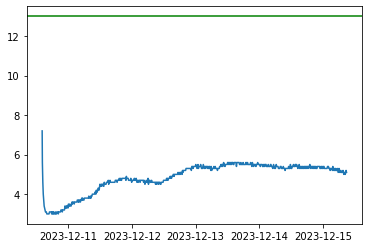

In [66]:
plt.plot(temperature);
plt.axhline(13, color="g");

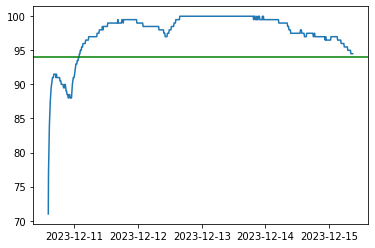

In [65]:
plt.plot(humidity);
plt.axhline(94, color="g");